In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

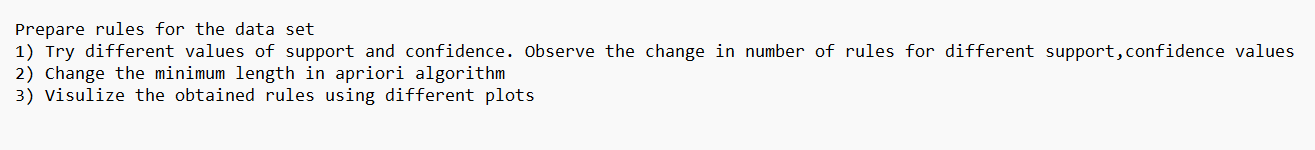

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movies_data = pd.read_csv('my_movies.csv')
movies_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies_data.shape

(10, 15)

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
# Checking null Values

movies_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
# Dropping 1st 4 columns

movies = movies_data.copy()

movies.drop(labels=['V1', 'V2', 'V3', 'V4', 'V5'], axis=1, inplace=True)
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [8]:
movies.shape

(10, 10)

In [9]:
# cHECKING NULL VALUES

movies.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

As we can see there are no null values present in dataset.

In [10]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Apriori Algorithm

#### Preparing data according to Apriori Algorithm Expectation

### 2% Support, 20% Confidence`

In [11]:
frequent_item_sets_1 = apriori(df =movies, min_support=0.02, use_colnames=True, max_len=6) #Frequent itemsets
frequent_item_sets_1

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [12]:
rules1 = association_rules(df = frequent_item_sets_1 ,metric='confidence', min_threshold=0.20)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
215,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
216,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
217,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
218,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


### Visualizing obtained rule1

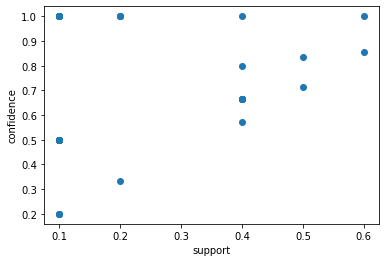

In [13]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [14]:
### 2% Support, 40% Confidence

In [15]:
frequent_item_sets_2 = apriori(df =movies, min_support=0.02, use_colnames=True, max_len=6) #Frequent itemsets
frequent_item_sets_2

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
rules2 = association_rules(df = frequent_item_sets_2 ,metric='confidence', min_threshold=0.40)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


### Visualizing obtained rule2

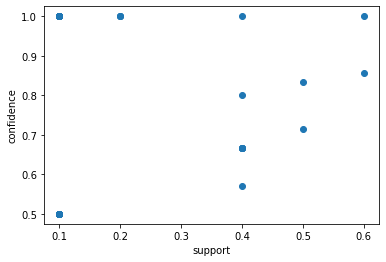

In [17]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 4% Support, 50% Confidence

In [18]:
frequent_item_sets_3 = apriori(df =movies, min_support=0.04, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_3

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
rules3 = association_rules(df = frequent_item_sets_3 , metric='confidence', min_threshold=0.50)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
182,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
183,(LOTR1),"(Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
184,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
185,(LOTR2),"(LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


### Visualizing obtained rule3

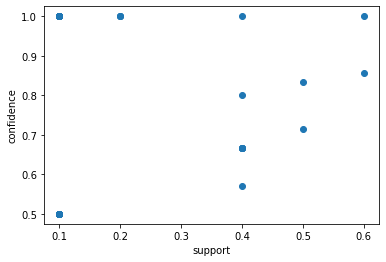

In [20]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 7% Support, 50% Confidence

In [21]:
frequent_item_sets_4 = apriori(df =movies, min_support=0.07, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_4

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [22]:
rules4 = association_rules(df = frequent_item_sets_4 , metric='confidence', min_threshold=0.50)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
182,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
183,(LOTR1),"(Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
184,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
185,(LOTR2),"(LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


### Visualizing obtained rule4

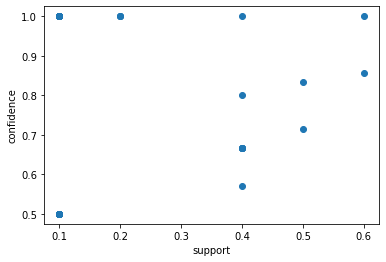

In [23]:
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 10% Support, 80% Confidence

In [24]:
frequent_item_sets_5 = apriori(df =movies, min_support=0.01, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_5

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [25]:
rules5 = association_rules(df = frequent_item_sets_5 , metric='confidence', min_threshold=0.80)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
100,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
101,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


### Visualizing obtained rule5

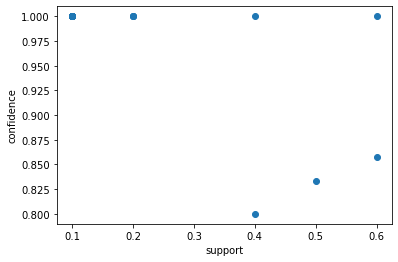

In [26]:
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 7% Support, 90% Confidence

In [27]:
frequent_item_sets_6 = apriori(df =movies, min_support=0.07, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_6

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [28]:
rules6 = association_rules(df = frequent_item_sets_6 , metric='confidence', min_threshold=0.90)
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
97,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
98,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
99,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
100,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.0,5.000000,0.08,inf


### Visualizing obtained rule6

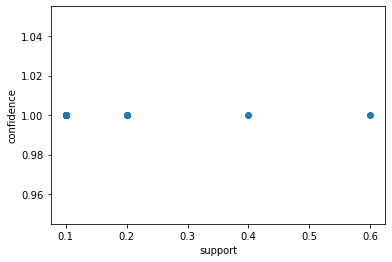

In [29]:
plt.scatter(rules6['support'],rules6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

So From Above 6 cases we observed that:

1) Lower the Confidence level Higher the no. of rules and vice-versa.

2) Higher the Support, lower the no. of rules.

3) Higher the max length , higher the noo.of rules.

So, we can conclude that these 3 parameters different combinations can generate different rules.